# Lab 7 Learning rate and Evaluation

## Lab07-4-mnist_introduction

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(777)  # for reproducibility

In [3]:
# tensorflow 홈페이지에서 mnist 데이터 다운
from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
''' DataSets 클래스(tf 객체)
        train, validation, test의 멤버변수 가지고 있음!!
        images : 이미지 데이터셋
        labels : label 데이터셋
        num_examples : 데이터 갯수
        next_batch : 데이터셋으로부터 필요한 만큼의 데이터를 반환하는 함수'''
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  # one_hot=True : 자동으로 y(response)를 one hot 변환해줌

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# class 개수 : 10개 (0 ~ 9)
nb_classes = 10

In [5]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [6]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [7]:
# cost function
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [8]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
# parameters
training_epochs = 15    # epoch : 같은 데이터를 몇 번 재사용(반복) 할지?
batch_size = 100        # batch_size : 한 번 알고리즘을 처리할 때 몇개의 데이터를 처리할지?

Epoch: 0001 cost = 2.826302771
Epoch: 0002 cost = 1.061668980
Epoch: 0003 cost = 0.838061328
Epoch: 0004 cost = 0.733232760
Epoch: 0005 cost = 0.669279898
Epoch: 0006 cost = 0.624611845
Epoch: 0007 cost = 0.591160350
Epoch: 0008 cost = 0.563868995
Epoch: 0009 cost = 0.541745175
Epoch: 0010 cost = 0.522673585
Epoch: 0011 cost = 0.506782337
Epoch: 0012 cost = 0.492447652
Epoch: 0013 cost = 0.479955842
Epoch: 0014 cost = 0.468893671
Epoch: 0015 cost = 0.458703483
Learning finished
Accuracy:  0.8951
Label:  [3]
Prediction:  [8]


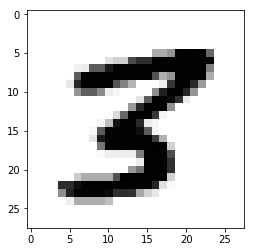

'\nEpoch: 0001 cost = 2.868104637\nEpoch: 0002 cost = 1.134684615\nEpoch: 0003 cost = 0.908220728\nEpoch: 0004 cost = 0.794199896\nEpoch: 0005 cost = 0.721815854\nEpoch: 0006 cost = 0.670184430\nEpoch: 0007 cost = 0.630576546\nEpoch: 0008 cost = 0.598888191\nEpoch: 0009 cost = 0.573027079\nEpoch: 0010 cost = 0.550497213\nEpoch: 0011 cost = 0.532001859\nEpoch: 0012 cost = 0.515517795\nEpoch: 0013 cost = 0.501175288\nEpoch: 0014 cost = 0.488425370\nEpoch: 0015 cost = 0.476968593\nLearning finished\nAccuracy:  0.888\n'

In [10]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        # 한 번에 batch_size만큼 처리할 것이기 때문에 전체 data 개수를 batch_size로 나눈 만큼 반복
        # batch_size씩 training하고 이를 total_batch 만큼 반복을 하면 1 epoch(1번 epoch 실행됨)
        total_batch = int(mnist.train.num_examples / batch_size)
         
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch     # avg_cost에 각 batch만큼 training한 model의 cost를 더해줌

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test using test sets (accuracy 계산)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # test set에서 랜덤하게 하나 뽑아서 predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
    # 랜덤하게 뽐은 데이터를 plot으로 출력시켜봄
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()


'''
Epoch: 0001 cost = 2.868104637
Epoch: 0002 cost = 1.134684615
Epoch: 0003 cost = 0.908220728
Epoch: 0004 cost = 0.794199896
Epoch: 0005 cost = 0.721815854
Epoch: 0006 cost = 0.670184430
Epoch: 0007 cost = 0.630576546
Epoch: 0008 cost = 0.598888191
Epoch: 0009 cost = 0.573027079
Epoch: 0010 cost = 0.550497213
Epoch: 0011 cost = 0.532001859
Epoch: 0012 cost = 0.515517795
Epoch: 0013 cost = 0.501175288
Epoch: 0014 cost = 0.488425370
Epoch: 0015 cost = 0.476968593
Learning finished
Accuracy:  0.888
'''
